# Sprint 06. Tasca 01. Test d'hipòtesi
## By José Manuel Castaño

## - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

 Agafo el dataset **credit cards customers** amb informació d'usuaris de credit cards, utilitzat a el sprint 05 i 06

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
creditcard = pd.read_csv('BankChurners.csv')

Eliminem algunes columnes per recomanació del creador de l'arxiu.   
Cambiem alguns noms de les columnes per fer-los més inteligibles i operatius

In [3]:
creditcard.drop(creditcard.columns[[16,19,21,22]], axis='columns', inplace=True)

In [4]:
creditcard.rename(columns={'Total_Relationship_Count':'Total_Products', 'Months_Inactive_12_mon':'Months_Inactive','Contacts_Count_12_mon':'Contacts_Count',
                           'Total_Revolving_Bal':'Revolving', 'Avg_Open_To_Buy':'Open_To_Buy','Total_Trans_Ct':'Transaction_Count','Total_Trans_Amt':'Transaction_Amount',
                           'Avg_Utilization_Ratio':'Utilization_Ratio'}, inplace=True)
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


La base de dades té 10.000 clients usuaris de credit cards categoritzats per edad, sexe, salari, estat civil i d'altres.   
L'explicació dels camps així com els gràfics de distribucions dels diferents atributs estan detallats a l'exercici 05 i 06

Per fer el test d'hipotesi agafo l'atribut **Customer_Age** que representa l'edat de tots els clients. 
Com es pot veure en el gràfic, es tracta d'una variable amb distribució unimodal, bastant simètrica i que te un aspecte semblant a normal, però obviament truncat pels extrems.

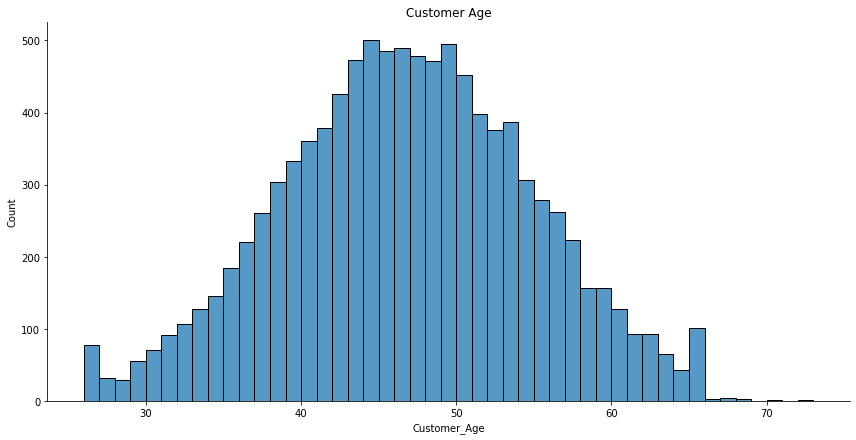

In [5]:
sns.displot(x='Customer_Age', data=creditcard, height= 6, aspect=2).set(title='Customer Age');

In [6]:
creditcard['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

Volem comprobar l'edat mitjana de la població a partir d'una mostra del 5%. Plantegem la següent hipòtesi:
###### Hipòtesis:
- $H_0:$ La mitjana de Customer_Age és de **45 anys**
- $H_1:$ La mitjana de Customer_Age no és de 46 anys    
El significant level (**alpha**) seria de **0.05**

Simulem que no podem treballar amb tota la població i agafem una mostra aleatoria simple del 5% de la població. Com la mostra és inferior al 10% es raonable pensar que els valors són independents.  
La mostra té un tamany de 506 (superior a 30), per tant la seva mitjana tindrà un comportament normal (central limit theorem).   
Com la mostra és suficientment gran, és raonable pensar que tindrà la mateixa variança que la població.   
Per tant, es donen les condicions per aplicar els Student's t-test

In [27]:
n=506
sample1 = creditcard['Customer_Age'].sample(n)
print('Mitjana de la mostra= {0:.2f}'.format(sample1.mean()))

Mitjana de la mostra= 46.58


Comparem la distribució del total de la població amb la distribució de la mostra de 506 observacions

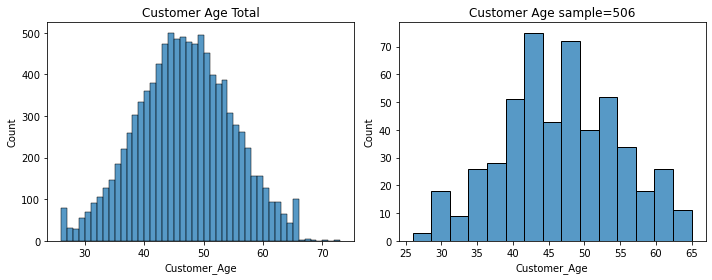

In [28]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.histplot(x='Customer_Age', data=creditcard, ax=axs[0]).set(title='Customer Age Total');
sns.histplot(x=sample1, ax=axs[1]).set(title='Customer Age sample=506');
f.tight_layout()

Podem apreciar similituts entre la distribució de la població i la distribució de la mostra de 506 observacions

Plantegem el **ttest_1samp** amb la hipòtesi nula que la mitja de la població és de **46** anys

In [29]:
alpha=0.05
stat, p = stats.ttest_1samp(sample1, popmean=45)
print('stat = {0:.3f}\np-value = {1:.3f}'.format(stat,p))
if p> alpha:
    print('H0 no pot ser rebutjada, probablement la mitjana de Customer_Age sigui de 45 anys')
else:
    print('H0 pot ser rebutjada, probablement la mitjana de Customer_Age no sigui de 45 anys')

stat = 4.336
p-value = 0.000
H0 pot ser rebutjada, probablement la mitjana de Customer_Age no sigui de 45 anys


##### **Resultats:**  
Rebutgem la hipòtesi nula. Per tant, probablement la mitjana de la població no sigui de 45 anys, amb un significant level del 5%

## - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Comprobarem si la edat dels clients homes és diferent de l'edat dels clients dones. Plantegem la següent hipòtesi:
###### Hipòtesis:
- $H_0:$ La Customer_Age mitjana dels homes és igual que la Customer_Age mitjana de les dones
- $H_1:$ La Customer_Age mitjana dels homes no és igual que la Customer_Age mitjana de les dones    
El significant level (**alpha**) seria de **0.05**

Veiem la distribució, mitjana i variança dels 2 subsets (homes i dones)

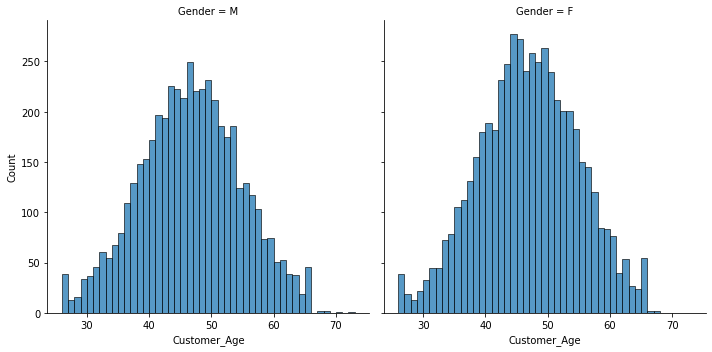

In [5]:
sns.displot(x='Customer_Age', col='Gender',data=creditcard);

In [31]:
male = creditcard[creditcard['Gender']=='M']['Customer_Age']
female = creditcard[creditcard['Gender']=='F']['Customer_Age']
pd.concat([male.describe().round(3),female.describe().round(3)], keys=['Male','Female'], axis=1)

,Male,Female
count,4769.000,5358.000
mean,46.179,46.457
std,8.093,7.947
min,26.000,26.000
25%,41.000,41.000
50%,46.000,46.000
75%,52.000,52.000
max,73.000,67.000


Veiem que la població d'homes i dones tenen un tamany, distribució d'edats i variança que s'assemblen.    
La mitja d'homes és de 46.179 anys i la de dones de 46.457 anys.   
Pensem que es donen les condicions per aplicar els Student's t-test.

Apliquem el ttest_ind per aceptar o rebutjar que homes i dones tenen la mateixa edat mitjana, amb un significant level de **0.05**

In [32]:
alpha=0.05
stat, p = stats.ttest_ind(male, female)
print('stat = %.3f\np-value = %.3f' % (stat,p))
if p> alpha:
    print('H0 no pot ser rebutjada, probablement la mitjana de Customer_Age dels homes sigui igual a la de dones')
else:
    print('H0 pot ser rebutjada, probablement la mitjana de Customer_Age dels homes no sigui igual a la de dones')

stat = -1.742
p-value = 0.082
H0 no pot ser rebutjada, probablement la mitjana de Customer_Age dels homes sigui igual a la de dones


**Resultats:**  
No podem rebutjar la hipòtesi nula. Per tant, probablement la mitjana de edats d'homes i dones sigui la mateixa, amb un significant level del 5%

### - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Ara volem veure si l'edat mitjana dels clients depen del nivell d'ingressos.   
Farem 3 subsets:  
- ingres_baix: menys de $40k
- ingres_mitjà: entre 40-60k
- ingres_alt: més de 120K

Comprobarem si la edat mitjana dels clients d'ingrés baix, mitjà i alt són iguals. Plantegem la següent hipòtesi:
##### Hipòtesis:
- $H_0:$ La mitjana de Customer_Age dels clients d'ingés baix, mitjà i alt és la mateixa
- $H_1:$ L'edat mitjana dels clients d'ingés baix, mitjà i alt no és la mateixa  
El significant level (**alpha**) seria de **0.05**

Fem els 3 subsets segons els ingressos

In [33]:
ingres_baix = creditcard[creditcard['Income_Category']=='Less than $40K']['Customer_Age']
ingres_mitja = creditcard[creditcard['Income_Category']=='$40K - $60K']['Customer_Age']
ingres_alt = creditcard[creditcard['Income_Category']=='$120K +']['Customer_Age']

Veiem la distribució, mitjana i variança dels 3 subsets 

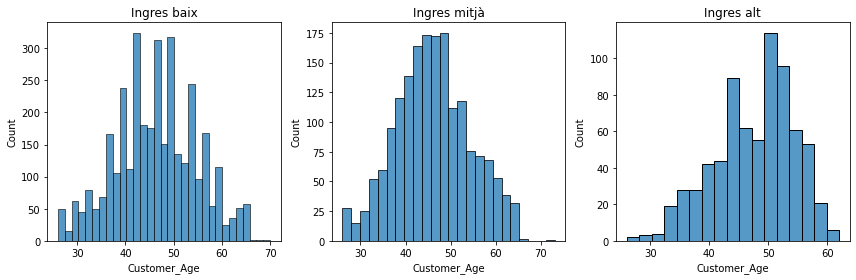

In [34]:
f, axs = plt.subplots(1,3, figsize=(12, 4), gridspec_kw=dict(width_ratios=[3.5, 3.5, 3.5]))
sns.histplot(x=ingres_baix, ax=axs[0]).set(title='Ingres baix');
sns.histplot(x=ingres_mitja, ax=axs[1]).set(title='Ingres mitjà');
sns.histplot(x=ingres_alt, ax=axs[2]).set(title='Ingres alt');
f.tight_layout()

In [35]:
pd.concat([ingres_baix.describe(), ingres_mitja.describe(), ingres_alt.describe()], keys=['ingres_baix', 'ingres_mitjà', 'ingres_alt'], axis=1)

,ingres_baix,ingres_mitjà,ingres_alt
count,3561.000000,1790.000000,727.000000
mean,46.297950,46.087151,47.603851
std,8.446741,8.434617,6.769921
min,26.000000,26.000000,26.000000
25%,41.000000,40.000000,43.000000
50%,46.000000,46.000000,49.000000
75%,52.000000,52.000000,53.000000
max,70.000000,73.000000,62.000000


Veiem que: 
- El tamany d'ingrés_alt és més petit que els altres, pero suficienment alt com per donar validessa als resultats estadístics
- Ingres_baix i ingrés_mitja tenen una mitjana similar, ingres_alt sembla que té una mitjana més alta
- Ingres_baix i ingrés_mitja tenen una variaça similar, ingres_alt sembla diferent
- Les distribucions de ingrés_baix i ingres_mitja podem pensar que són semblants. La de ingrés alt es veu desplaçada a la dreta i te cua cap l'esquerra

Farem el test ANOVA per rebutjar o no la $H_0$

In [36]:
alpha=0.05
stat, p = stats.f_oneway(ingres_baix, ingres_mitja, ingres_alt)
print('stat = %.3f\np-value = %.3f' % (stat,p))
if p> alpha:
    print('H0 no pot ser rebutjada, probablement la mitjana de Customer_Age pels 3 nivells d ingressos siguin iguals')
else:
    print('H0 pot ser rebutjada, probablement la mitjana de Customer_Age pels 3 nivells d ingressos no siguin iguals')

stat = 9.273
p-value = 0.000
H0 pot ser rebutjada, probablement la mitjana de Customer_Age pels 3 nivells d ingressos no siguin iguals


**Resultats:**  
Podem rebutjar la hipòtesi nula. Per tant, probablement la mitjana de edats pels 3 nivells d'ingressos no sigui la mateixa, amb un significant level del 5%

Sabem que la mitjana no és la mateixa pels 3 grups. Per determinar quin grup te la mitjana diferent apliquem el **test de Tukeys**

In [50]:
df_tukey=creditcard.loc[creditcard.Income_Category.str.match('Less than \$40K|\$40K - \$60K|\$120K +'), ['Customer_Age', 'Income_Category']]
tukey = pairwise_tukeyhsd(endog=df_tukey['Customer_Age'], groups=df_tukey['Income_Category'], alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2     meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
    $120K +    $40K - $60K  -1.5167  0.001 -2.3684  -0.665   True
    $120K + Less than $40K  -1.3059  0.001  -2.094 -0.5178   True
$40K - $60K Less than $40K   0.2108 0.6397 -0.3503  0.7719  False
-----------------------------------------------------------------


**Resultats:**   
Amb un significant level del 5%, 
- Rebutgem que el grup ingres_alt tingui la mateixa mitjana que el grup ingres_mitja (p=0.001)
- Rebutgem que el grup ingres_alt tingui la mateixa mitjana que el grup ingres_baix (p=0.001)
- No podem rebutjar que el grup ingres_mitja tingui la mateixa mitjana que el grup ingres_mitja (p=0.639)   
Es a dir, que **el grup de ingres_alt te mitjana diferent respecte als altres 2 grups**